In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import sys
sys.path.append("../")
from sklearn.metrics import  mean_squared_error


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../data/train_clean.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("price", axis=1),
    df.price, 
    test_size=0.2
)

In [4]:
model = DecisionTreeRegressor(max_depth=1)

In [5]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [6]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.2835063228454175

## grid search

In [26]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [2, 4, 6, 8, 10, 12],
        "min_samples_split": [10, 50, 100, 200, 300, 500, 1000],
    },
    cv=5,
   
)

In [27]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [10, 50, 100, 200, 300, 500,
                                               1000]})

In [31]:
best_model = gs.best_estimator_
best_model

DecisionTreeRegressor(max_depth=12, min_samples_split=10)

In [32]:
mean_squared_error(gs.best_estimator_.predict(X_test), y_test)

0.013702149154064576

# Entrenamos con todo el dataset de train

In [13]:
X = df.drop("price", axis=1)
y =  df.price

In [17]:
model = DecisionTreeRegressor(max_depth=3)

In [18]:
model.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [19]:
mean_squared_error(
    y_true = y,
    y_pred = model.predict(X)
)

0.07169739696392152

In [20]:
from sklearn.tree import plot_tree

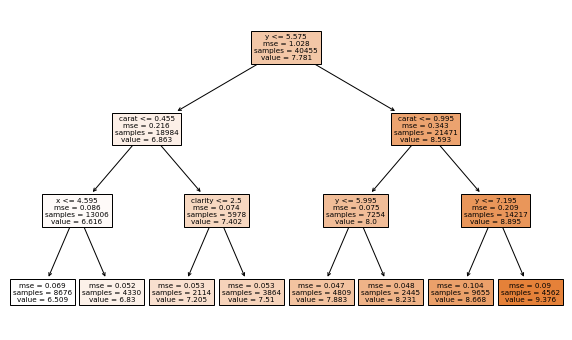

In [21]:

fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

## grid search

In [34]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [2, 4, 6, 8, 10, 12],
        "min_samples_split": [10, 50, 100, 200, 300, 500, 1000],
    },
    cv=5,
   
)

In [35]:
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [10, 50, 100, 200, 300, 500,
                                               1000]})

In [36]:
best_model = gs.best_estimator_
best_model

DecisionTreeRegressor(max_depth=12, min_samples_split=50)

In [37]:
mean_squared_error(gs.best_estimator_.predict(X_test), y_test)

0.00980672794155412